In [1]:
import os


In [3]:
path = os.listdir('../raw_data')

In [4]:
path

['impress1.jpeg',
 '.DS_Store',
 'impress7.jpeg',
 'impress6.jpeg',
 '.keep',
 'impress5.jpeg',
 'impress4.jpeg',
 'impress8.jpeg',
 'impress3.jpeg',
 'impress2.jpeg']

In [5]:
path = [x for x in path if x.endswith('jpeg')]

In [49]:
path

['impress3.jpeg',
 'impress4.jpeg',
 'impress1.jpeg',
 'impress5.jpeg',
 'impress6.jpeg',
 'impress2.jpeg',
 'impress8.jpeg',
 'impress7.jpeg']

In [8]:
import tensorflow as tf

In [45]:
import random

In [48]:
random.shuffle(path)

In [66]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, X,
                 batch_size=4,
                 input_size=(224, 224),
                 shuffle=True):
        
        self.X = X.copy()
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.X)
    
    def on_epoch_end(self):
        if self.shuffle:
            print('resuffling data...')
            random.shuffle(self.X)
    
    def img_loader(self, path):
        return np.array(tf.keras.utils.load_img(path))
    
    def resize(self, img):
        return tf.image.resize(img, self.input_size)
    
    def __getitem__(self, index):
        temp_list = []
        for i in range(index*self.batch_size,(index+1)*self.batch_size):
            img = self.img_loader(self.X[i])
            img = self.resize(img)
            temp_list.append(img)
        return np.stack(temp_list)
    
    def __len__(self):
        return self.n // self.batch_size

In [37]:
long_path  = [os.path.join('../raw_data/', x) for x in path]

In [67]:
path_loader = CustomDataGen(long_path)

(4, 224, 224, 3)
(4, 224, 224, 3)
resuffling data...
(4, 224, 224, 3)
(4, 224, 224, 3)
resuffling data...
(4, 224, 224, 3)
(4, 224, 224, 3)
resuffling data...
(4, 224, 224, 3)
(4, 224, 224, 3)
resuffling data...


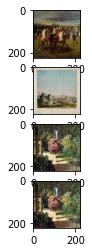

In [68]:
for epoch in range(4):
    for idx in range(len(path_loader)):
        x = path_loader[idx]
        print(x.shape)
    plt.subplot(4,1,epoch+1)
    plt.imshow(x[0]/255)
    path_loader.on_epoch_end()

In [12]:
import numpy as np

In [13]:
np.array(tf.keras.utils.load_img('../raw_data/'+path[0]))

array([[[ 65,  38,  29],
        [ 54,  35,  29],
        [ 43,  34,  29],
        ...,
        [ 67, 124,  79],
        [ 68, 125,  80],
        [ 73, 118,  77]],

       [[ 36,  43,  27],
        [ 27,  29,  18],
        [ 42,  34,  31],
        ...,
        [ 82, 124,  86],
        [ 84, 126,  88],
        [ 88, 119,  85]],

       [[ 48,  71,  53],
        [ 30,  43,  33],
        [ 35,  35,  33],
        ...,
        [ 76, 113,  79],
        [ 79, 116,  82],
        [ 78, 107,  76]],

       ...,

       [[ 22,  32,  31],
        [ 22,  22,  24],
        [ 44,  33,  39],
        ...,
        [130, 120,  84],
        [148, 140,  93],
        [140, 130,  81]],

       [[ 16,  26,  25],
        [ 22,  22,  24],
        [ 45,  34,  40],
        ...,
        [127, 114,  79],
        [144, 133,  87],
        [135, 123,  75]],

       [[ 24,  34,  33],
        [ 29,  30,  32],
        [ 37,  31,  35],
        ...,
        [116, 108,  89],
        [133, 126,  97],
        [134, 123,  91]]

In [20]:
def img_loader(path, directory):
    new_path = os.path.join(directory, path)
    return np.array(tf.keras.utils.load_img(new_path))
def resize(img, target):
    return tf.image.resize(img, target)
    
    

In [21]:
first_img = img_loader(path[0],'../raw_data/')

In [24]:
import matplotlib.pyplot as plt

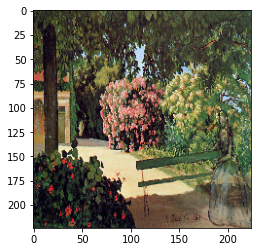

In [26]:
plt.imshow(resize(first_img/255, (224,224)))

In [27]:
path

['impress1.jpeg',
 'impress7.jpeg',
 'impress6.jpeg',
 'impress5.jpeg',
 'impress4.jpeg',
 'impress8.jpeg',
 'impress3.jpeg',
 'impress2.jpeg']

In [32]:
batch_size = 2
def batch_loader(batch_number, list_path):
    temp_list = []
    for i in range(batch_number*batch_size,(batch_number+1)*batch_size):
        img = img_loader(list_path[i], direc)
        img = resize(img, (224,224))
        temp_list.append(img)
    return np.stack(temp_list)

In [31]:
direc = '../raw_data/'

In [34]:
batch_loader(0,path).shape

(2, 224, 224, 3)